### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-12-06-bis/single/NY/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241206$25^NO TREATMENT CONTROL$25^LOCX_5 POS$25^LOCX_1 neg$25^LOCX_2 neg$single.txt
20241206$25^LOCX_3 NAC pos$25^LOCX_4 NAC neg$25^LOCX_6 neg$single.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, sep="\t")
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
0,1,4385.4,30.0,-0.000709,-4.850000e+06,0.000000e+00,0.01230,0.200,6.49,0.801,6.49,0.000005,63.276,0.908,207.0,NO TREATMENT CONTROL
1,2,3868.2,30.3,0.669000,5.240000e+09,3.120000e-07,0.00798,0.264,19.30,0.859,51.10,0.000024,47.323,0.757,196.0,NO TREATMENT CONTROL
2,3,4399.2,30.6,0.703000,4.880000e+09,4.220000e-07,0.00738,0.262,18.30,0.818,45.90,0.000025,42.455,0.717,163.0,NO TREATMENT CONTROL
3,4,3192.7,30.4,0.535000,5.100000e+09,0.000000e+00,0.00883,0.230,20.10,0.855,51.30,0.000022,58.717,0.683,214.0,NO TREATMENT CONTROL
4,5,2545.4,30.7,0.485000,5.850000e+09,0.000000e+00,0.00591,0.293,25.80,0.815,55.70,0.000017,49.087,0.544,214.0,NO TREATMENT CONTROL


Statistical significance between NO TREATMENT CONTROL and LOCX_3 NAC pos: p = 0.0279
Statistical significance between LOCX_1 neg and LOCX_3 NAC pos: p = 0.0180
Statistical significance between LOCX_1 neg and LOCX_6 neg: p = 0.0388
Statistical significance between LOCX_3 NAC pos and LOCX_4 NAC neg: p = 0.0483


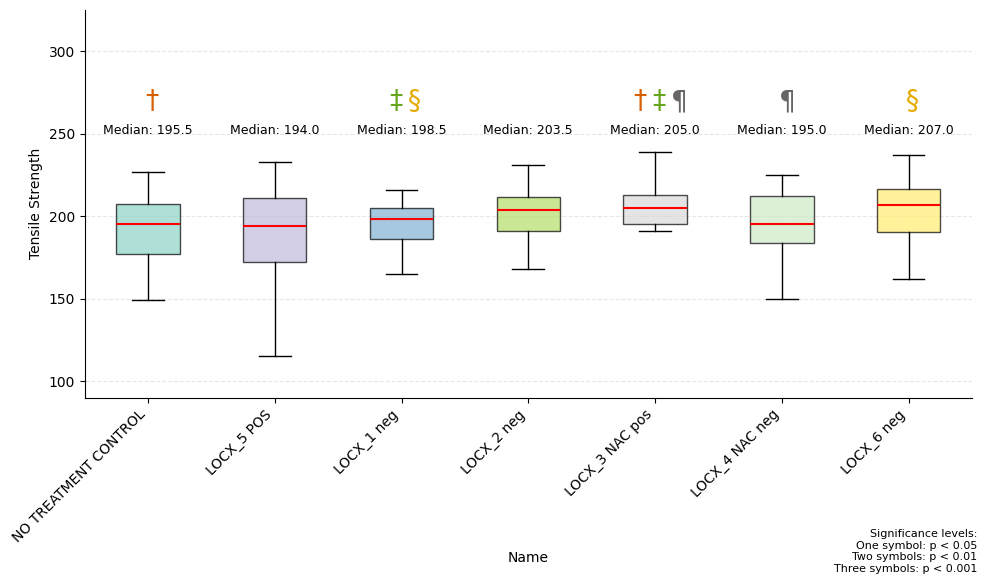

In [7]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [8]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")


Median TENSILE_STRENGTH for NO TREATMENT CONTROL: 195.5
Median TENSILE_STRENGTH for LOCX_5 POS: 194.0
Median TENSILE_STRENGTH for LOCX_1 neg: 198.5
Median TENSILE_STRENGTH for LOCX_2 neg: 203.5
Median TENSILE_STRENGTH for LOCX_3 NAC pos: 205.0
Median TENSILE_STRENGTH for LOCX_4 NAC neg: 195.0
Median TENSILE_STRENGTH for LOCX_6 neg: 207.0


In [9]:
len(df_merged)

168

Statistical significance between LOCX_5 POS and LOCX_2 neg: p = 0.0333
Statistical significance between LOCX_5 POS and LOCX_3 NAC pos: p = 0.0489
Statistical significance between LOCX_5 POS and LOCX_4 NAC neg: p = 0.0013
Statistical significance between LOCX_5 POS and LOCX_6 neg: p = 0.0313
Statistical significance between LOCX_1 neg and LOCX_4 NAC neg: p = 0.0138


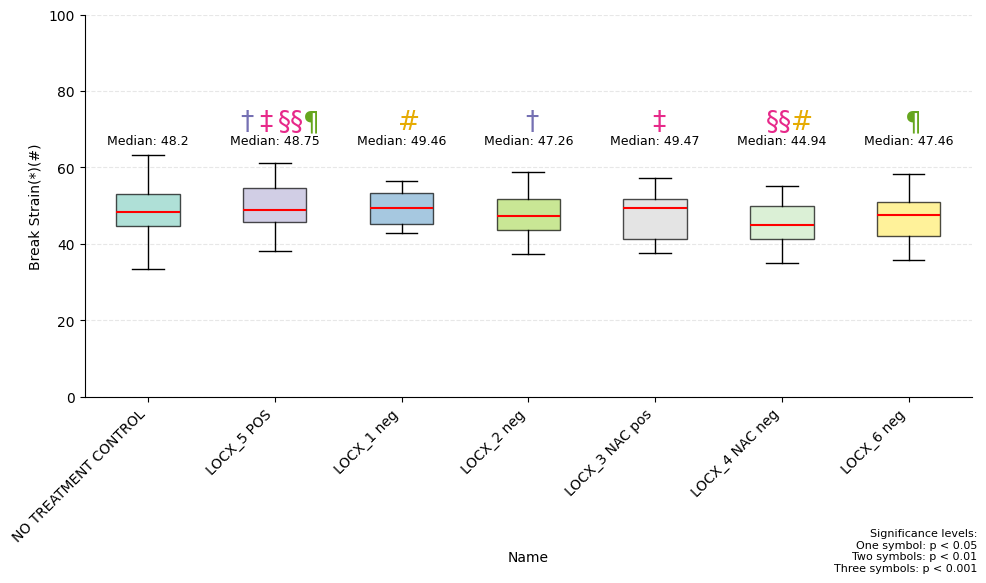

In [10]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between NO TREATMENT CONTROL and LOCX_3 NAC pos: p = 0.0043
Statistical significance between LOCX_5 POS and LOCX_3 NAC pos: p = 0.0359
Statistical significance between LOCX_1 neg and LOCX_3 NAC pos: p = 0.0076
Statistical significance between LOCX_2 neg and LOCX_3 NAC pos: p = 0.0292
Statistical significance between LOCX_3 NAC pos and LOCX_6 neg: p = 0.0342


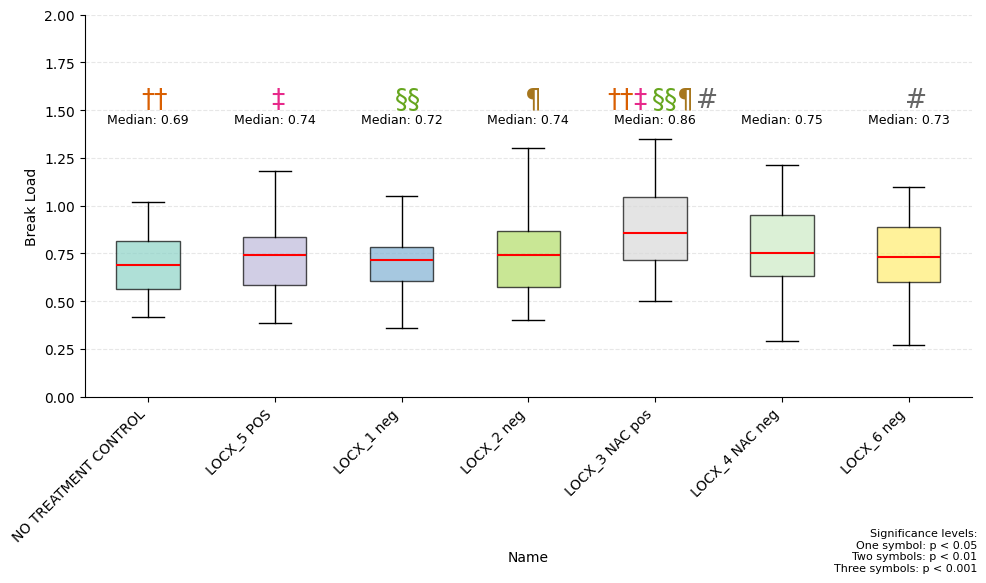

In [11]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()